## Fetch Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
filePath = '/content/drive/MyDrive/Beijing PM2.5'
allFiles = glob.glob(filePath + "/*.csv")
dataFrames = []
for i in allFiles:
    df = pd.read_csv(i, index_col=None, header=0)
    dataFrames.append(df)
data = pd.concat(dataFrames)
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [3]:
# drop the row no column and rename the columns
data.drop(["No"], axis=1, inplace=True)
data.rename(columns = {'year': 'Year',
                       'month': 'Month',
                       'day': "Day",
                       'hour': 'Hour',
                       'pm2.5': 'PM2.5',
                       'DEWP': 'DewP',
                       'TEMP': 'Temp',
                       'PRES': 'Press',
                       'RAIN': 'Rain',
                       'wd': 'WinDir',
                       'WSPM': 'WinSpeed',
                       'station': 'Station'}, inplace = True)
data

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [4]:
# check the null data
data.isnull().sum()

Year            0
Month           0
Day             0
Hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
Temp          398
Press         393
DewP          403
Rain          390
WinDir       1822
WinSpeed      318
Station         0
dtype: int64

In [5]:
# fill the null values in numerical columns with average specific to certain column
# fill in the missing data in the columns according to the Month average.
unique_Month = pd.unique(data.Month)

# find PM2_5 averages in Month specific
# Equalize the average PM2.5 values to the missing values in PM2_5 specific to Month
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["PM2.5", 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed'] # it can be add more column
for c in unique_Month:
    
    # create Month filter
    Month_filtre = temp_data.Month == c
    # filter data by Month
    fitered_data = temp_data[Month_filtre]
    
    # find average for PM2_5 in specific to Month
    for s in columns:
        mean = np.round(np.mean(fitered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Month
            fitered_data[s] = fitered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Month:{c}")
        else: # find average for all data if no average in specific to Month
            all_data_mean = np.round(np.mean(data[s]),2)
            fitered_data[s] = fitered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    # Synchronize data filled with missing values in PM2.5 to data temporary            
    temp_data[Month_filtre] = fitered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in PM2.5 column fill with 94.66 when Month:3
Missing Value in PM10 column fill with 136.04 when Month:3
Missing Value in SO2 column fill with 28.0 when Month:3
Missing Value in NO2 column fill with 60.12 when Month:3
Missing Value in CO column fill with 1310.23 when Month:3
Missing Value in O3 column fill with 51.04 when Month:3
Missing Value in Temp column fill with 8.35 when Month:3
Missing Value in Press column fill with 1013.96 when Month:3
Missing Value in DewP column fill with -7.95 when Month:3
Missing Value in Rain column fill with 0.01 when Month:3
Missing Value in WinSpeed column fill with 1.98 when Month:3
Missing Value in PM2.5 column fill with 72.73 when Month:4
Missing Value in PM10 column fill with 116.96 when Month:4
Missing Value in SO2 column fill with 14.22 when Month:4
Missing Value in NO2 column fill with 47.28 when Month:4
Missing Value in CO column fill with 840.49 when Month:4
Missing Value in O3 column fill with 70.19 when Month:4
Missing Value in

In [6]:
# fill the null values in categorical columns with mode specific to certain column

# fill in the missing data in the WinDir column with mode values according to the Station.
unique_Station = pd.unique(data.Station)

# find columns mode value in WinDir column according to Station column specific
# Equalize the mode values of columns to the missing values
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["WinDir"] # it can be add more column
for c in unique_Station:
    
    # create Station filter
    Station_filtre = temp_data.Station == c
    
    # filter data by Station
    filtered_data = temp_data[Station_filtre]
    
    # find mode for WinDir specific to Station
    for column in columns:
        mode = statistics.mode(filtered_data[column])
        filtered_data[column] = filtered_data[column].fillna(mode)
        print(f"Missing Value in {column} column fill with {mode} when Station:{c}")

    # Synchronize data filled with missing values in WinDir to data temporary            
    temp_data[Station_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in WinDir column fill with NE when Station:Aotizhongxin
Missing Value in WinDir column fill with NNW when Station:Changping
Missing Value in WinDir column fill with NNW when Station:Dingling
Missing Value in WinDir column fill with ENE when Station:Dongsi
Missing Value in WinDir column fill with NE when Station:Guanyuan
Missing Value in WinDir column fill with N when Station:Gucheng
Missing Value in WinDir column fill with NW when Station:Huairou
Missing Value in WinDir column fill with ENE when Station:Nongzhanguan
Missing Value in WinDir column fill with NNE when Station:Shunyi
Missing Value in WinDir column fill with ENE when Station:Tiantan
Missing Value in WinDir column fill with NE when Station:Wanliu
Missing Value in WinDir column fill with NE when Station:Wanshouxigong


In [7]:
# creating date field for further analysis by extracting day of the week, month etc.
data['Date']=pd.to_datetime(data[['Year', 'Month', 'Day']])
data.tail()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,Date
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28
35063,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong,2017-02-28


In [8]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [9]:
data['DayNames'] = data['Date'].apply(lambda x: findDay(x))
data.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,Date,DayNames
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday


## Exploratory Data Analysis and Data Visualization

In [10]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Year      420768 non-null  int64         
 1   Month     420768 non-null  int64         
 2   Day       420768 non-null  int64         
 3   Hour      420768 non-null  int64         
 4   PM2.5     420768 non-null  float64       
 5   PM10      420768 non-null  float64       
 6   SO2       420768 non-null  float64       
 7   NO2       420768 non-null  float64       
 8   CO        420768 non-null  float64       
 9   O3        420768 non-null  float64       
 10  Temp      420768 non-null  float64       
 11  Press     420768 non-null  float64       
 12  DewP      420768 non-null  float64       
 13  Rain      420768 non-null  float64       
 14  WinDir    420768 non-null  object        
 15  WinSpeed  420768 non-null  float64       
 16  Station   420768 non-null  object      

In [11]:
# statistical information about data
data.drop(["Year", "Month", "Day", "Hour", "DayNames", "Date"], axis=1).describe()

,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinSpeed
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.766552,104.613484,15.816928,50.614391,1232.984577,57.222136,13.530570,1010.753847,2.481623,0.064444,1.729784
std,80.009899,91.093395,21.458894,34.658713,1136.591613,56.000446,11.437563,10.473051,13.795491,0.820626,1.245936
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,57.000000,83.000000,7.140000,44.000000,900.000000,45.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,109.000000,144.000000,20.000000,70.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


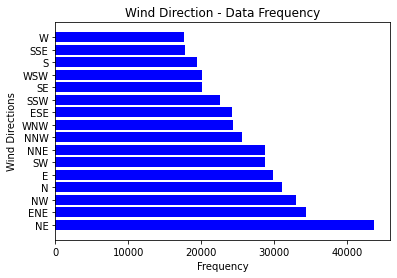

Number of Wind Direction 
NE     43699
ENE    34376
NW     32902
N      31028
E      29752
SW     28756
NNE    28715
NNW    25606
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: WinDir, dtype: int64


In [12]:
# Number of sample according to WinDir
plt.figure()
plt.barh(data["WinDir"].value_counts().index, data["WinDir"].value_counts(), color = "b")
#plt.xticks(data["WinDir"].values)
plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Wind Direction - Data Frequency")
plt.show()
print(f"Number of Wind Direction \n{data['WinDir'].value_counts()}")

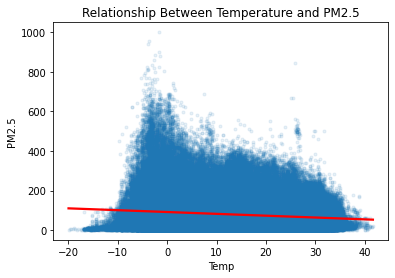

In [13]:
sns.regplot(x='Temp', y='PM2.5', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

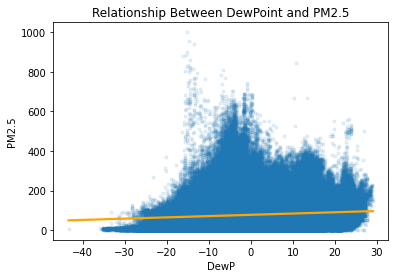

In [14]:
sns.regplot(x='DewP', y='PM2.5', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between DewPoint and PM2.5')
plt.show()

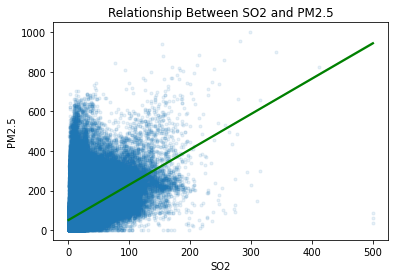

In [15]:
sns.regplot(x='SO2', y='PM2.5', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"green"})
plt.title('Relationship Between SO2 and PM2.5')
plt.show()

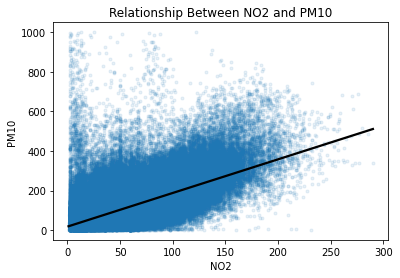

In [16]:
sns.regplot(x='NO2', y='PM10', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"black"})
plt.title('Relationship Between NO2 and PM10')
plt.show()

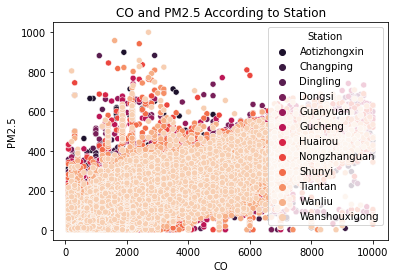

In [17]:
sns.scatterplot(x='CO', y='PM2.5', hue='Station', data=data, palette = "rocket")
plt.title('CO and PM2.5 According to Station')
plt.show()

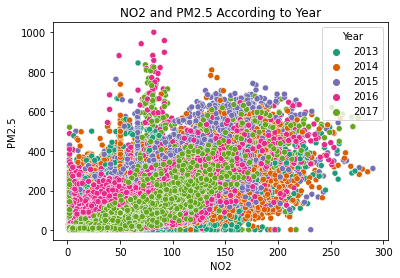

In [18]:
sns.scatterplot(x='NO2', y='PM2.5', hue='Year', data=data, palette = "Dark2")
plt.title('NO2 and PM2.5 According to Year')
plt.show()

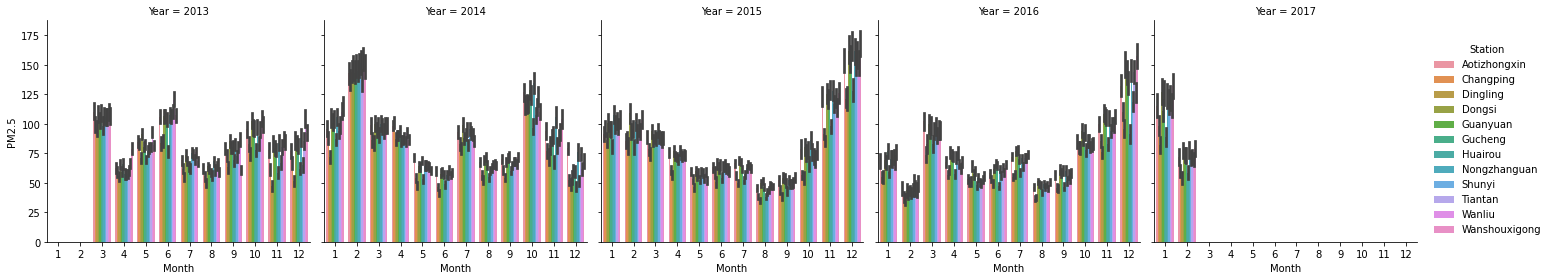

In [19]:
sns.catplot(x="Month", y="PM2.5",  hue="Station", col="Year",
                data=data, kind="bar", height=4)
plt.show()

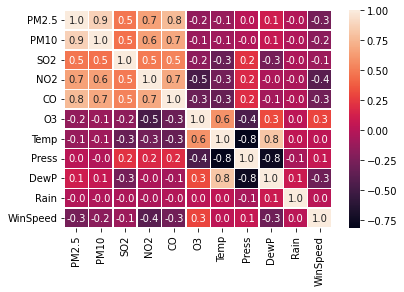

In [20]:
sns.heatmap(data.drop(["Year", "Month", "Day", "Hour", "Date"], axis=1).corr(),
            annot=True, linewidths=.5, fmt= '.1f')
plt.show()

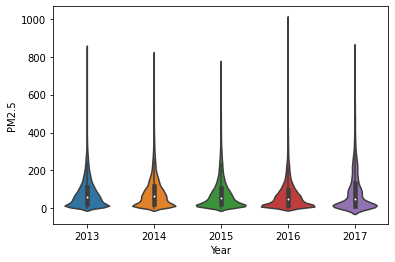

In [21]:
sns.violinplot(x="Year", y="PM2.5", data=data)
plt.show()

### Yearly Analysis

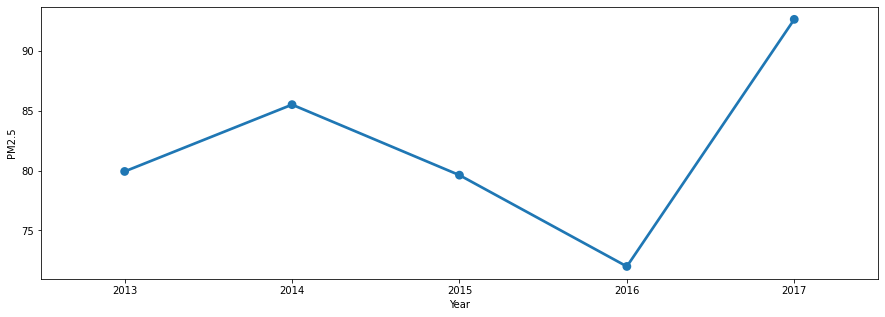

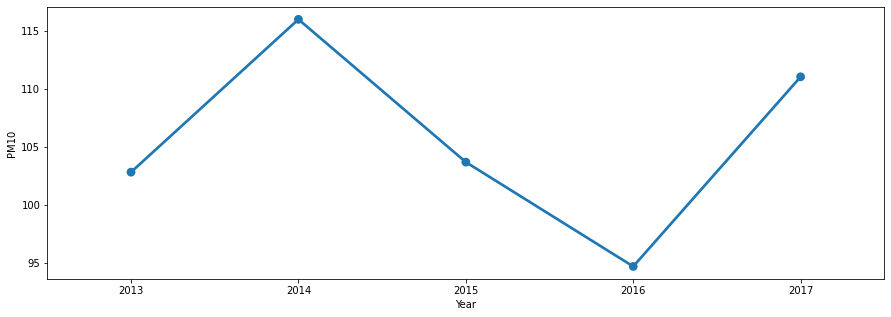

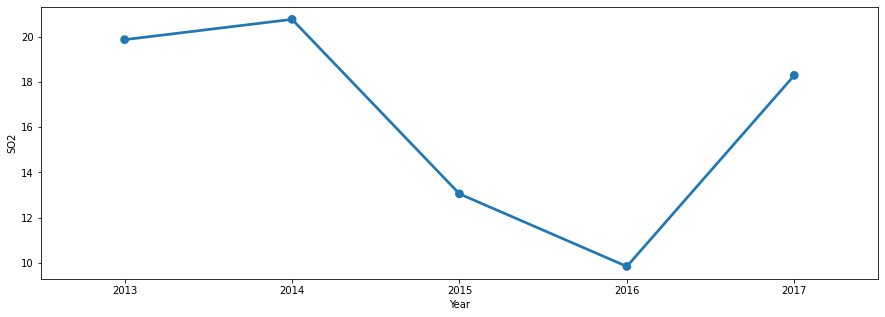

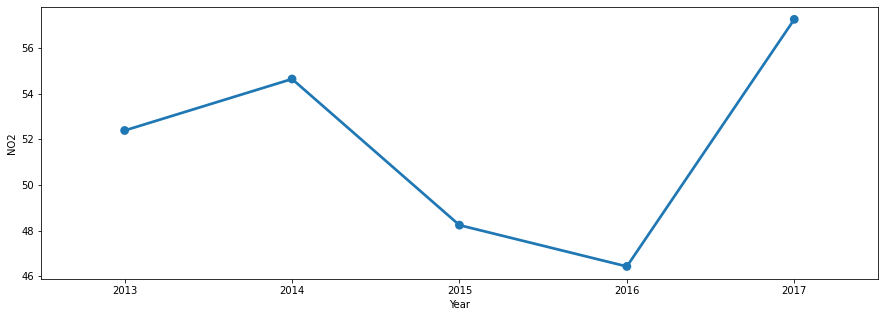

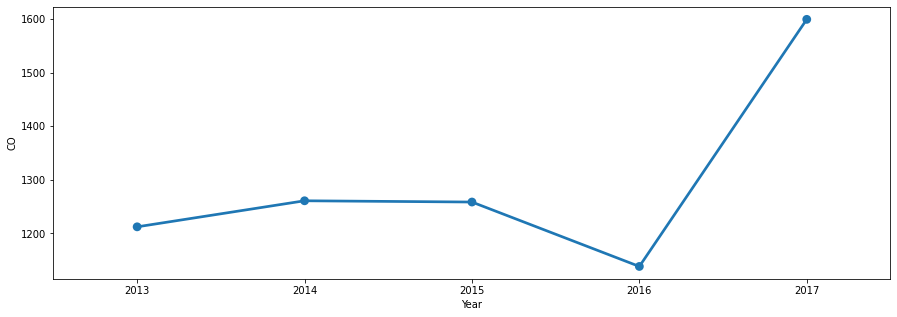

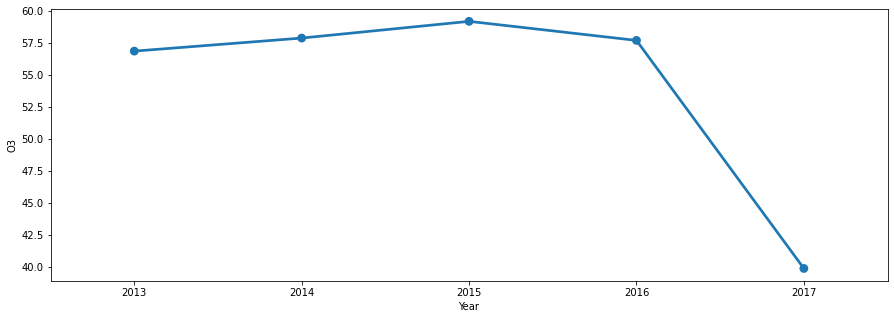

In [22]:
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for i in compounds:    
    df = data[[i, 'Year']].groupby(["Year"]).mean().reset_index().sort_values(by='Year', ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df)

### Monthly Analysis

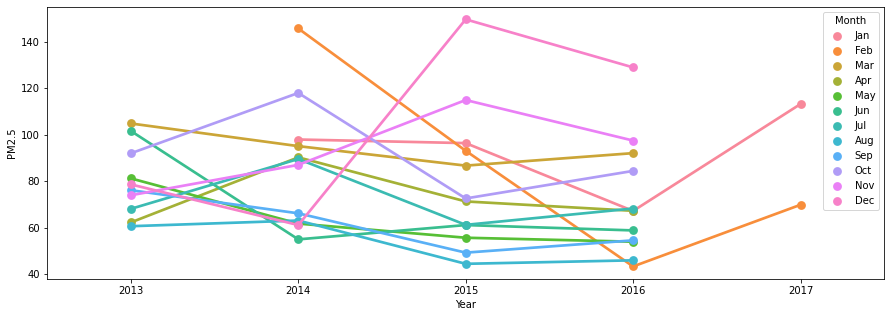

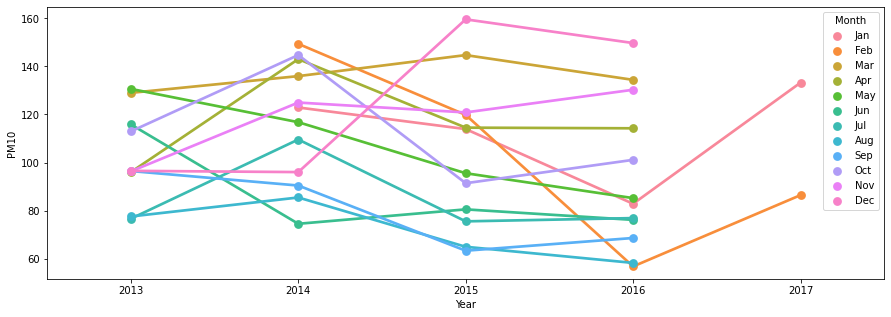

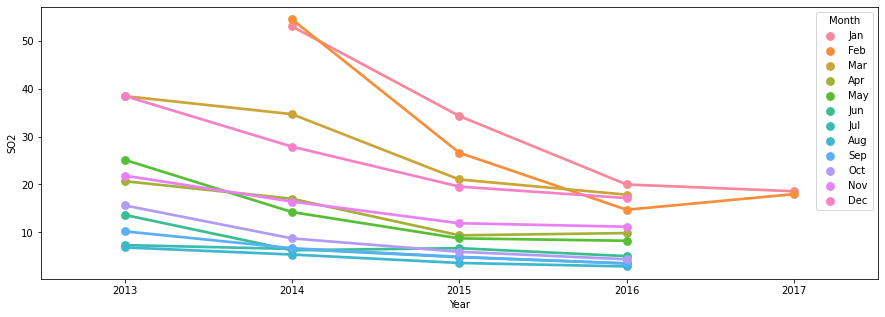

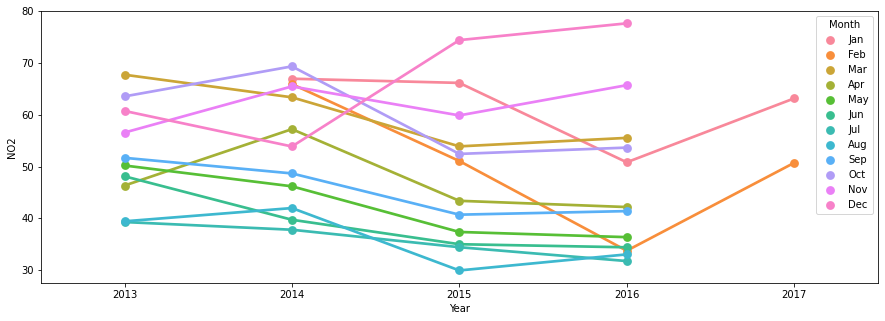

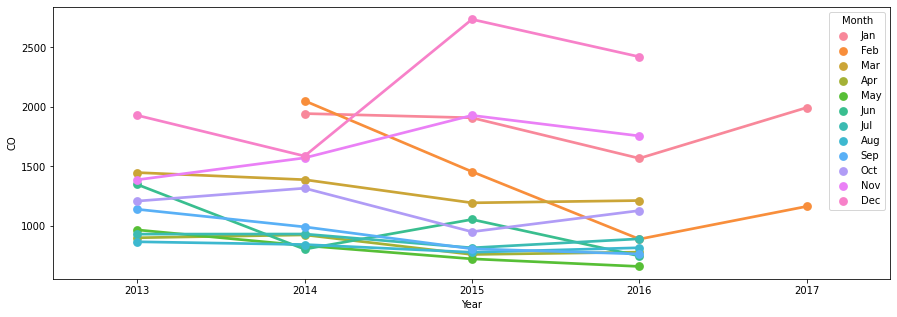

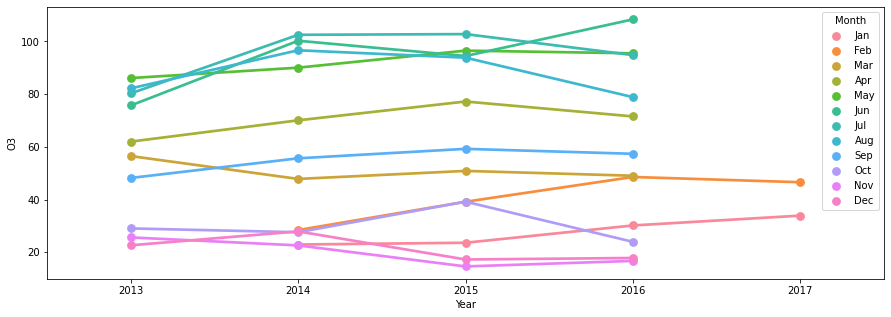

In [23]:
for i in compounds:
    temp_data = data.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                           'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'Month', 'Year',]].groupby(["Year",
                                                    "Month"]).mean().reset_index().sort_values(by=['Year',
                                                                                                   'Month'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df, hue='Month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                                  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

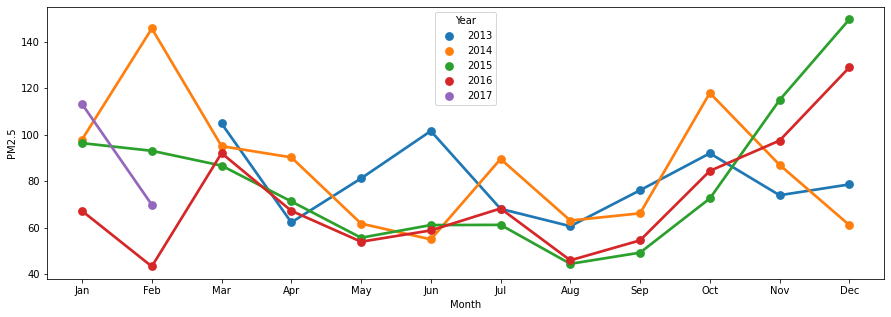

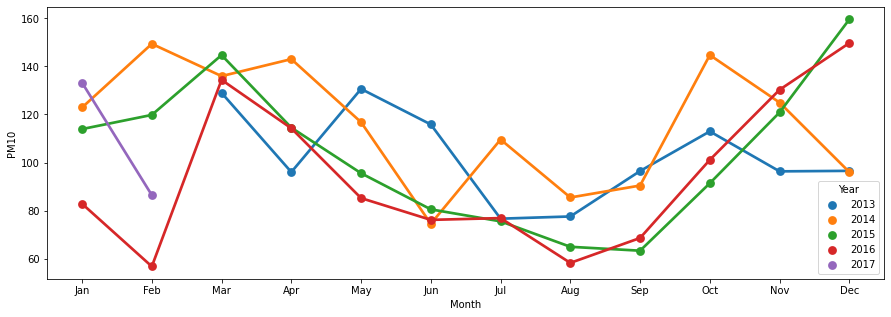

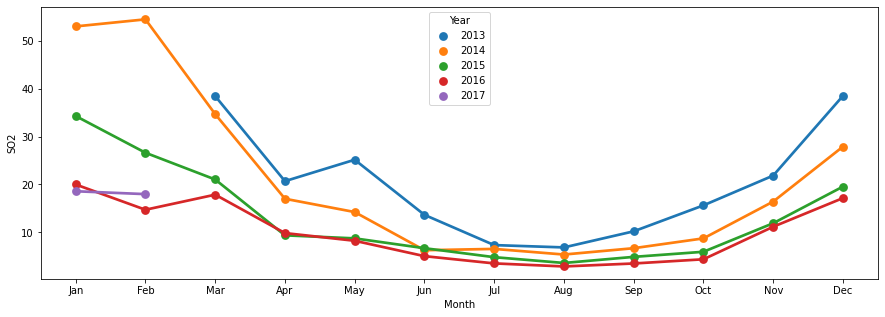

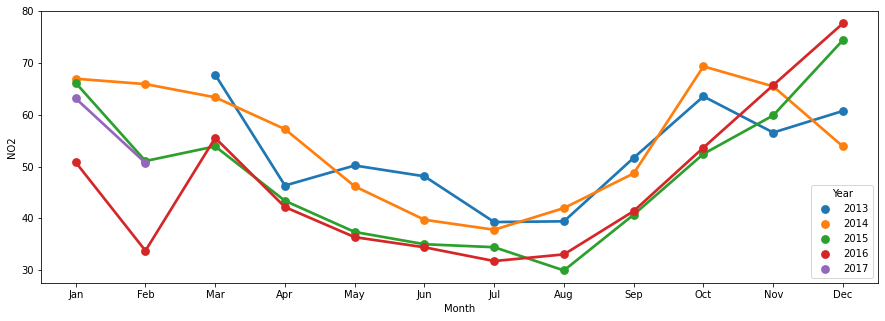

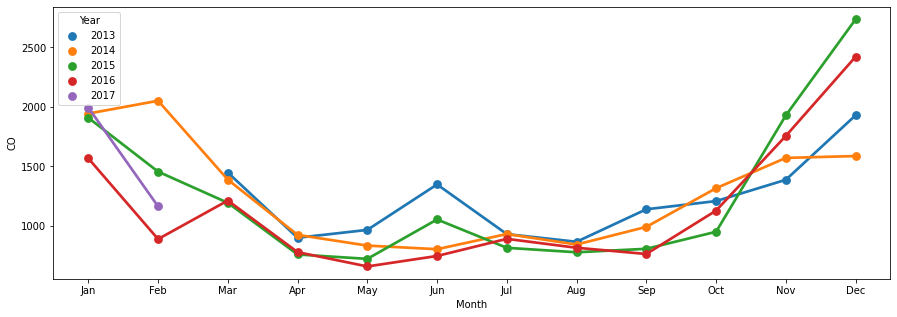

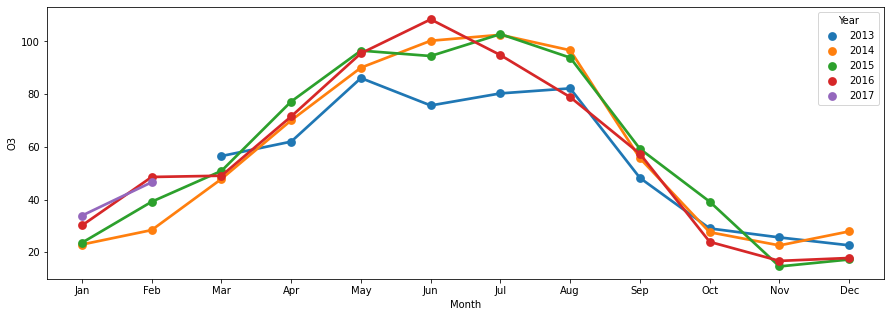

In [24]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
for i in compounds:    
    temp_data = data.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                               'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'Month', 'Year']].groupby(["Year",
                                                  "Month"]).mean().reset_index().sort_values(by=['Year', 
                                                                                                 'Month'], ascending=True)
    df = df.iloc[df['Month'].map(custom_dict).argsort()]
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Month', y=i, data=df, hue="Year")

### Weekly Analysis

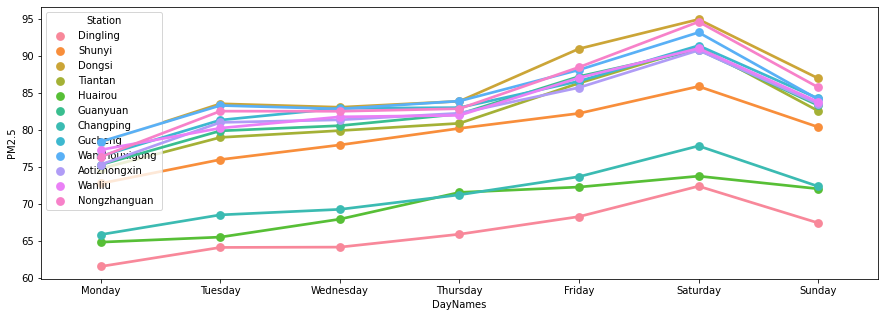

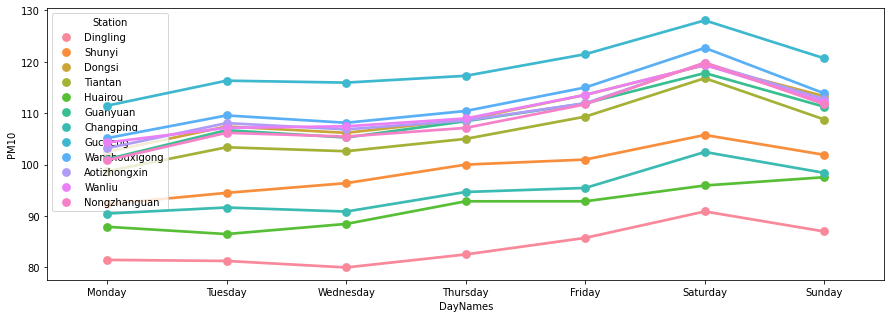

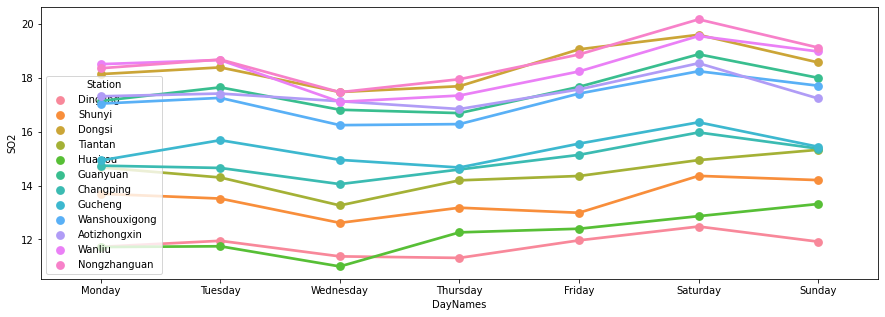

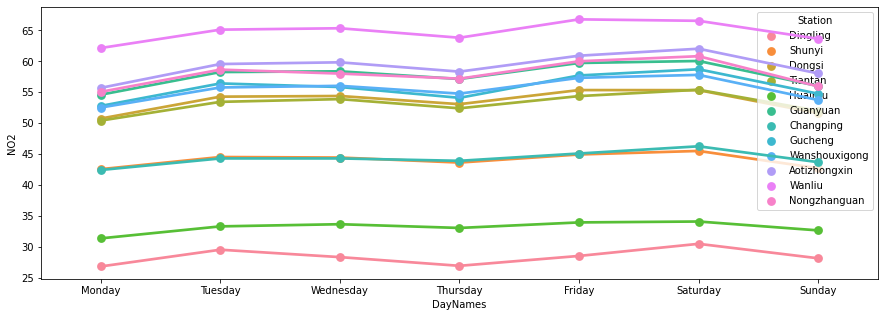

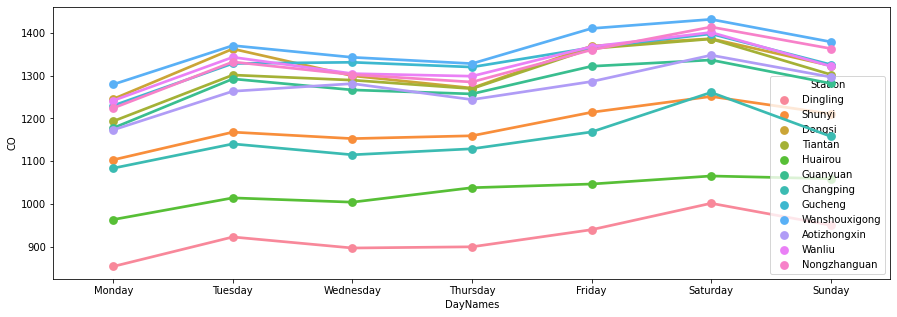

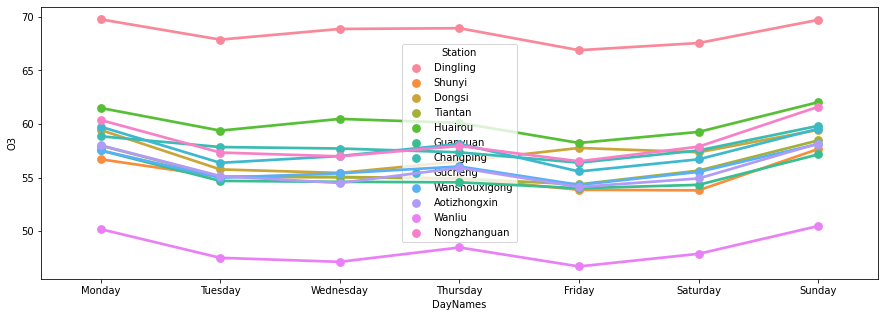

In [25]:
custom_day = {'Monday':0, 'Tuesday':1, 'Wednesday':2,
              'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
for i in compounds:
    df = data[[i, 'DayNames',
               'Station']].groupby(["Station",
                                    "DayNames"]).mean().reset_index().sort_values(by=['Station',
                                                                                      'DayNames'], ascending=True)
    df = df.iloc[df['DayNames'].map(custom_day).argsort()]
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='DayNames', y=i, data=df, hue="Station")

### Hourly Analysis

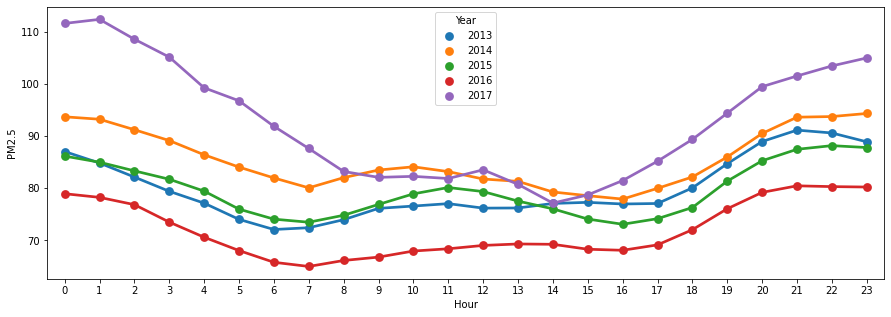

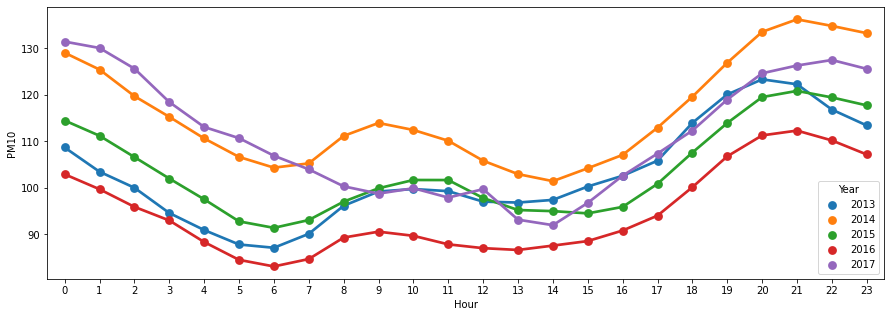

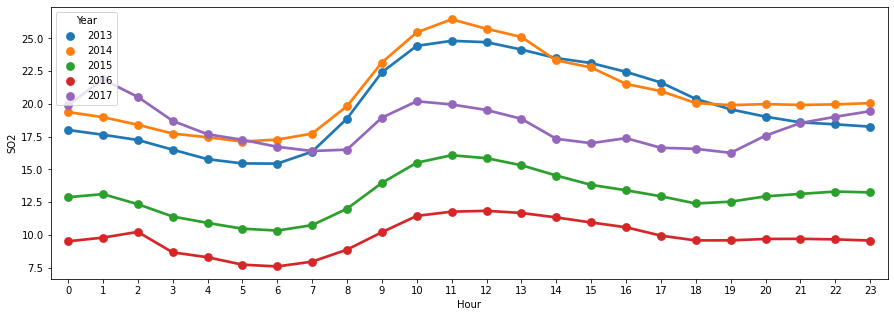

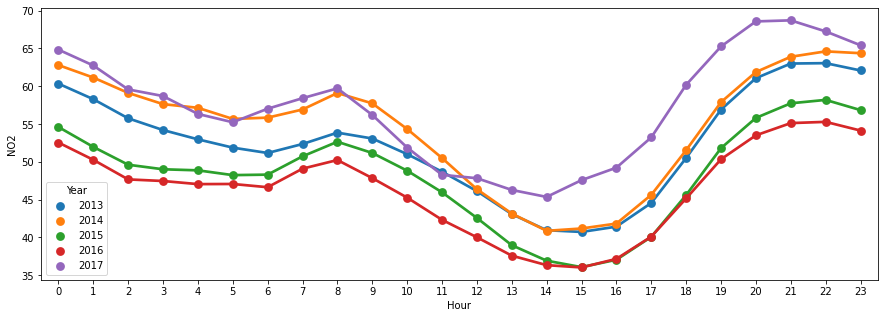

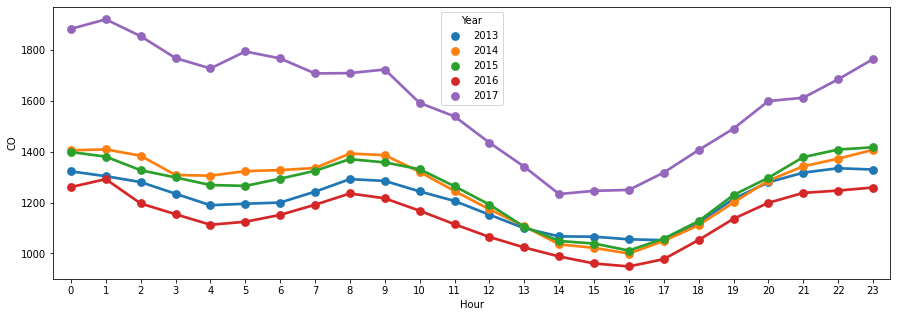

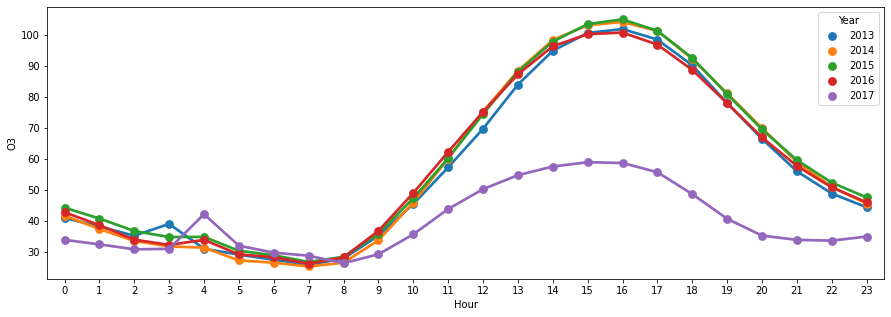

In [26]:
for i in compounds:   
    df = data[[i, 'Hour', 'Year']].groupby(["Year",
                                                 "Hour"]).mean().reset_index().sort_values(by=['Year',
                                                                                                 'Hour'], ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='Hour', y=i, data=df, hue="Year")
    plt.show()

### Station Based Analysis

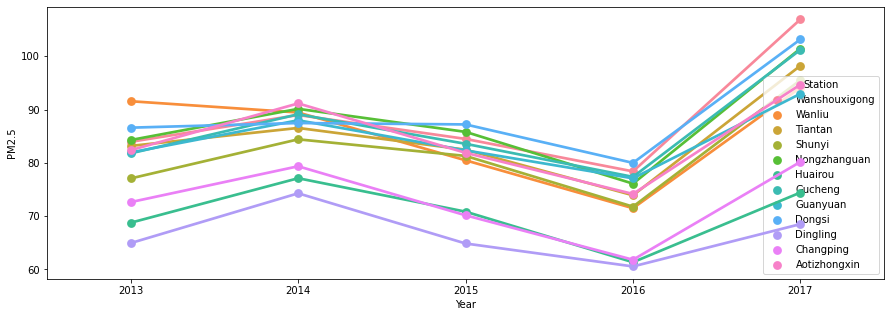

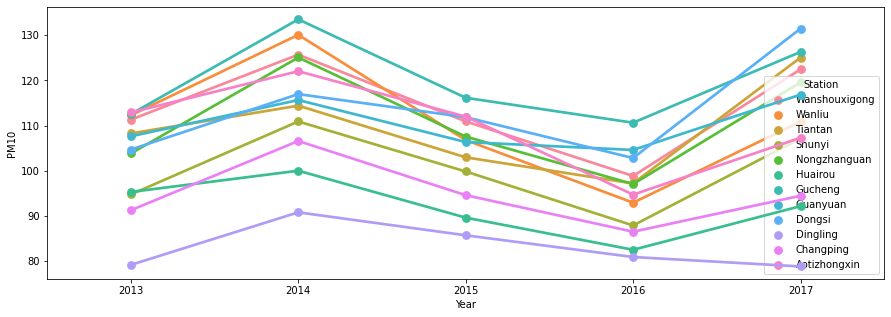

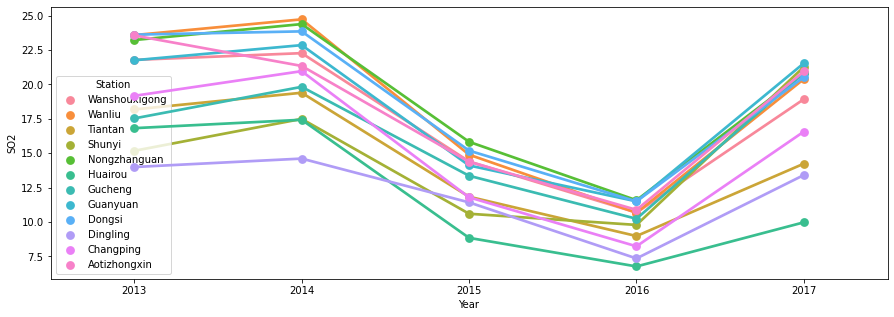

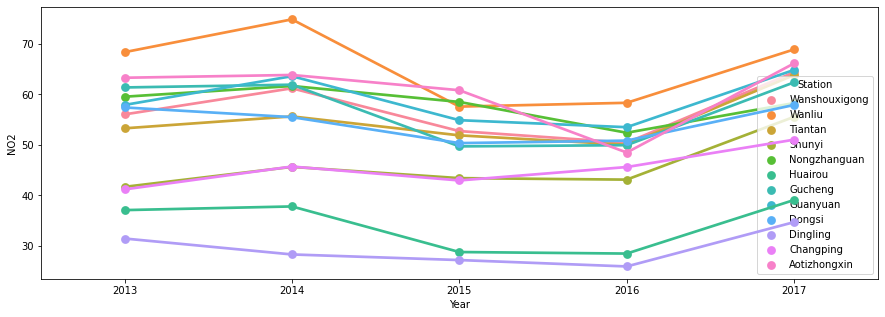

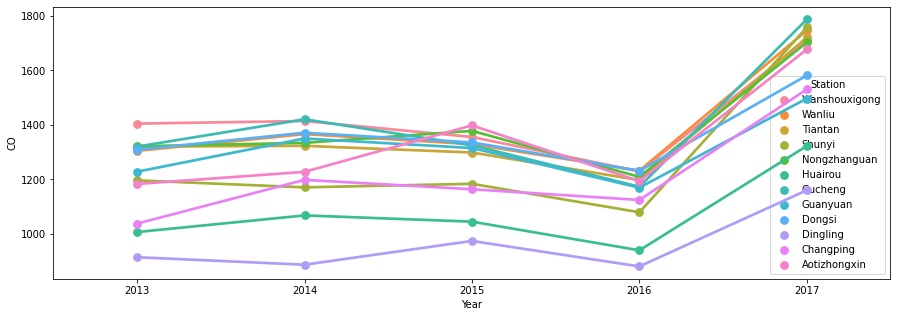

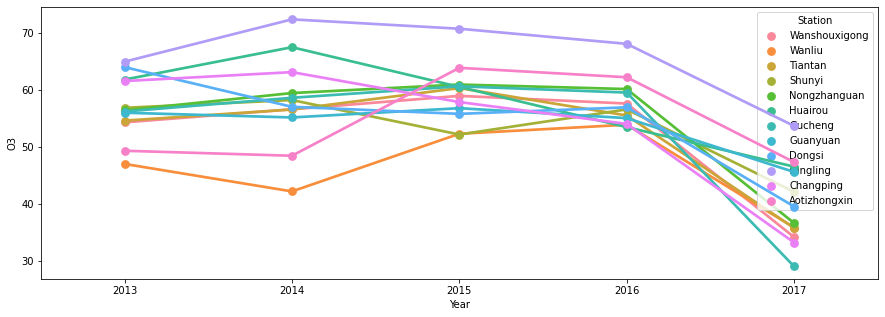

In [27]:
for i in compounds:  
    df = data[[i, 'Year', 'Station']].groupby(["Year",
                                               "Station"]).mean().reset_index().sort_values(by=['Station',
                                                                                                'Year'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df, hue="Station")
    plt.show()

## Preprocessing

In [28]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Year      420768 non-null  int64         
 1   Month     420768 non-null  int64         
 2   Day       420768 non-null  int64         
 3   Hour      420768 non-null  int64         
 4   PM2.5     420768 non-null  float64       
 5   PM10      420768 non-null  float64       
 6   SO2       420768 non-null  float64       
 7   NO2       420768 non-null  float64       
 8   CO        420768 non-null  float64       
 9   O3        420768 non-null  float64       
 10  Temp      420768 non-null  float64       
 11  Press     420768 non-null  float64       
 12  DewP      420768 non-null  float64       
 13  Rain      420768 non-null  float64       
 14  WinDir    420768 non-null  object        
 15  WinSpeed  420768 non-null  float64       
 16  Station   420768 non-null  object      

In [29]:
# drop some columns and reduce memory
data.drop(["DayNames", "Date", "PM10", "Year", "Month", "Day", "Hour"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PM2.5     420768 non-null  float64
 1   SO2       420768 non-null  float64
 2   NO2       420768 non-null  float64
 3   CO        420768 non-null  float64
 4   O3        420768 non-null  float64
 5   Temp      420768 non-null  float64
 6   Press     420768 non-null  float64
 7   DewP      420768 non-null  float64
 8   Rain      420768 non-null  float64
 9   WinDir    420768 non-null  object 
 10  WinSpeed  420768 non-null  float64
 11  Station   420768 non-null  object 
dtypes: float64(10), object(2)
memory usage: 57.9+ MB


In [30]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [31]:
categorical_variables = ["WinDir", "Station"]
for i in categorical_variables:
    print(f"For {i} column ")
    data[f"{i}"] = labelEncoder(data[f"{i}"])
    print("**********************************")

For WinDir column 
Encoding Approach:
NNW  ==>  6
N  ==>  3
NW  ==>  7
NNE  ==>  5
ENE  ==>  1
E  ==>  0
NE  ==>  4
W  ==>  13
SSW  ==>  11
WSW  ==>  15
SE  ==>  9
WNW  ==>  14
SSE  ==>  10
ESE  ==>  2
S  ==>  8
SW  ==>  12
**********************************
For Station column 
Encoding Approach:
Aotizhongxin  ==>  0
Changping  ==>  1
Dingling  ==>  2
Dongsi  ==>  3
Guanyuan  ==>  4
Gucheng  ==>  5
Huairou  ==>  6
Nongzhanguan  ==>  7
Shunyi  ==>  8
Tiantan  ==>  9
Wanliu  ==>  10
Wanshouxigong  ==>  11
**********************************


In [32]:
data.head()

,PM2.5,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
2,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0
3,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0


In [33]:
# create input and output
X = data.drop('PM2.5', axis = 1)
y = data['PM2.5']

In [34]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (336614, 11)
y_train: (336614,)
X_test: (84154, 11)
y_test: (84154,)


## Model Training and Evaluation

In [35]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# make a function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning regressors and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) for each regressors and
    comparison plot for regressors according to RMSE and MAE
    """
    Regressors = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(), 
                  KNeighborsRegressor(), DecisionTreeRegressor()]
    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    
    # function for mean absolute error
    def maeScore(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score
    
    # function for root mean square error
    def rmseScore(regressor):
        """
        :param regressor: regressor model function
        :return: root mean score error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score
    
    # mean absolute error, root mean square error for each regressors
    for regressor in Regressors:
        name = regressor.__class__.__name__
        mae_dict[name] = maeScore(regressor)
        mae_scores.append(maeScore(regressor))
        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmseScore(regressor))
        print("*************************************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
        
    #Plotting the performance of regressors
    def plotPerformance(scores_list, scores_dict, metric:str):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include regressors and evaluation scores
        :param metric: metric name y axis 
        :return: plot of performance comparison of regressors
        """
        
        N = len(Regressors)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Regressors")
        plt.title("Performance Comparison of Regressors")
        plt.ylabel(f"{metric} Error")
        plt.xticks(x, scores_dict.keys(), rotation=90)
        plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
        plt.show()
    
    # call the functions
    plotPerformance(mae_scores, mae_dict, "Mean Absolute")
    plotPerformance(rmse_scores, rmse_dict, "Root Mean Square")

*************************************************************************
LinearRegression Mean Absolute Error = 30.47275519151635
LinearRegression Root Mean Square Error = 46.00729261108492
*************************************************************************
RandomForestRegressor Mean Absolute Error = 18.228809744040685
RandomForestRegressor Root Mean Square Error = 29.895122217504593
*************************************************************************
GradientBoostingRegressor Mean Absolute Error = 25.72504975923456
GradientBoostingRegressor Root Mean Square Error = 40.5702048377864
*************************************************************************
KNeighborsRegressor Mean Absolute Error = 24.243629536326257
KNeighborsRegressor Root Mean Square Error = 39.704635223676554
*************************************************************************
DecisionTreeRegressor Mean Absolute Error = 25.031185326900683
DecisionTreeRegressor Root Mean Square Error = 43.419398343506

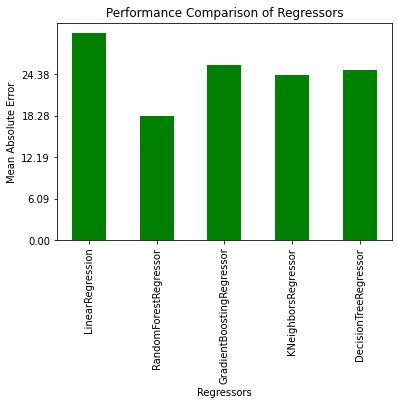

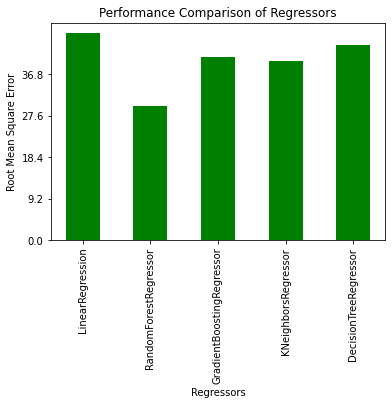

In [36]:
allRegressors(X_train, X_test, y_train, y_test)

## Hyperparameter Optimization

In [ ]:
# Choose the best model for tuning
# RandomForestRegressor can be choose but it take to much time for GridSearchCV because of my CPU.
# Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)